In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import datetime

In [2]:
raw = pd.read_parquet("escooter_history.parquet", engine="fastparquet")

## Data Cleaning

In [3]:
# create copy
df = raw.copy()

# fix data types
df = df.astype({
    "holiday": "boolean",
    "workingday": "boolean",
    "weather": "category"
})
# fix typo in weather
df.weather.cat.rename_categories(
    {"heacy rain or thunderstorm or snow or ice pallets": "heavy rain or thunderstorm or snow or ice pallets"}, inplace=True)

In [4]:
df.dtypes

datetime               datetime64[ns]
holiday                       boolean
workingday                    boolean
weather                      category
temp                          float64
atemp                         float64
humidity                        int64
windspeed                     float64
registered_customer           boolean
dtype: object

In [109]:
df.weather.unique()

['clear, few clouds', 'cloudy, mist', 'light snow or rain or thunderstorm', 'heavy rain or thunderstorm or snow or ice pal...]
Categories (4, object): ['clear, few clouds', 'cloudy, mist', 'light snow or rain or thunderstorm', 'heavy rain or thunderstorm or snow or ice pal...]

In [6]:
df.head(3)

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered_customer
0,2019-01-01 00:00:09,False,False,"clear, few clouds",9.84,14.395,81,0.0,True
1,2019-01-01 00:00:41,False,False,"clear, few clouds",9.84,14.395,81,0.0,True
2,2019-01-01 00:01:20,False,False,"clear, few clouds",9.84,14.395,81,0.0,True


In [7]:
df.describe()

,temp,atemp,humidity,windspeed
count,3.296021e+06,3.296021e+06,3.296021e+06,3.296021e+06
mean,2.330069e+01,2.694455e+01,5.667220e+01,1.344274e+01
std,7.417160e+00,7.960401e+00,1.825513e+01,8.042864e+00
min,8.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.722000e+01,2.121000e+01,4.200000e+01,7.001500e+00
50%,2.460000e+01,2.803000e+01,5.500000e+01,1.299800e+01
75%,2.952000e+01,3.257500e+01,7.000000e+01,1.900120e+01
max,4.100000e+01,5.000000e+01,1.000000e+02,5.699690e+01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296021 entries, 0 to 3296020
Data columns (total 9 columns):
 #   Column               Dtype         
---  ------               -----         
 0   datetime             datetime64[ns]
 1   holiday              boolean       
 2   workingday           boolean       
 3   weather              category      
 4   temp                 float64       
 5   atemp                float64       
 6   humidity             int64         
 7   windspeed            float64       
 8   registered_customer  boolean       
dtypes: boolean(3), category(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 147.7 MB


In [9]:
df.dtypes

datetime               datetime64[ns]
holiday                       boolean
workingday                    boolean
weather                      category
temp                          float64
atemp                         float64
humidity                        int64
windspeed                     float64
registered_customer           boolean
dtype: object

<AxesSubplot:>

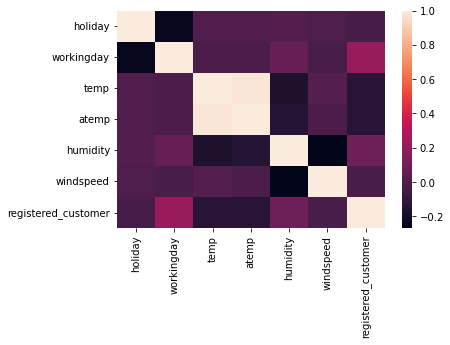

In [12]:
sns.heatmap(df.corr())

In [99]:
df_by_day = df.groupby([df.datetime.dt.date, df.registered_customer]).agg({"datetime": "count", 
                                                   "holiday": pd.Series.mode, 
                                                   "workingday": pd.Series.mode,
                                                   "temp": "mean",
                                                   "atemp": "mean",
                                                   "humidity": "mean",
                                                   "windspeed": "mean"}).rename(columns={"datetime": "count"}).reset_index()
df_by_hour = df.groupby([df.datetime.dt.hour, df.registered_customer]).agg({"datetime": "count", 
                                                   "holiday": pd.Series.mode, 
                                                   "workingday": pd.Series.mode,
                                                   "temp": "mean",
                                                   "atemp": "mean",
                                                   "humidity": "mean",
                                                   "windspeed": "mean"}).rename(columns={"datetime": "count"}).reset_index()
df_by_weather = df.groupby([df.datetime.dt.hour, df.weather]).agg({"datetime": "count", 
                                                   "holiday": pd.Series.mode, 
                                                   "workingday": pd.Series.mode,
                                                   "temp": "mean",
                                                   "atemp": "mean",
                                                   "humidity": "mean",
                                                   "windspeed": "mean"}).rename(columns={"datetime": "count"}).reset_index()

df_by_day.datetime = pd.to_datetime(df_by_day.datetime)
df_by_hour.rename(columns={"datetime": "hour"}, inplace=True)
df_by_weather.rename(columns={"datetime": "hour"}, inplace=True)

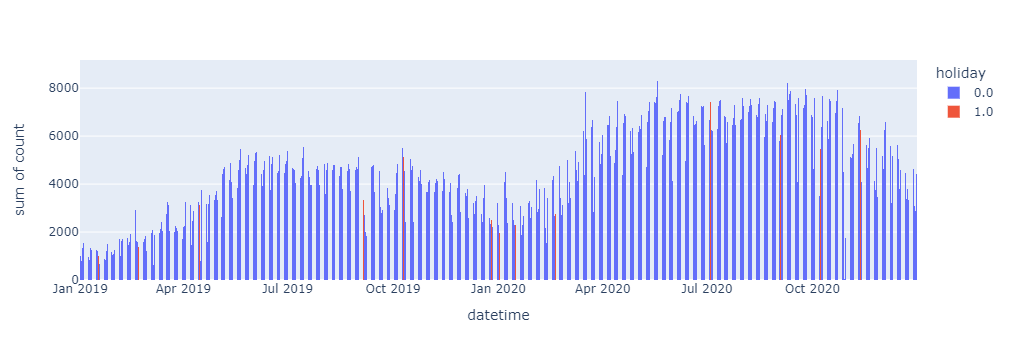

In [55]:
fig = px.histogram(df_by_day, x="datetime", y="count", color="holiday", nbins=len(df_by_day))
fig.show()

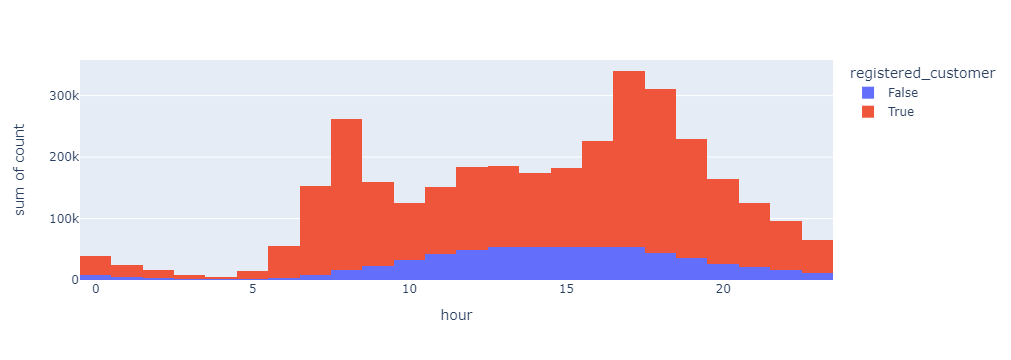

In [14]:
fig = px.histogram(df_by_hour, x="hour", y="count", color="registered_customer",nbins=24)
fig.show()

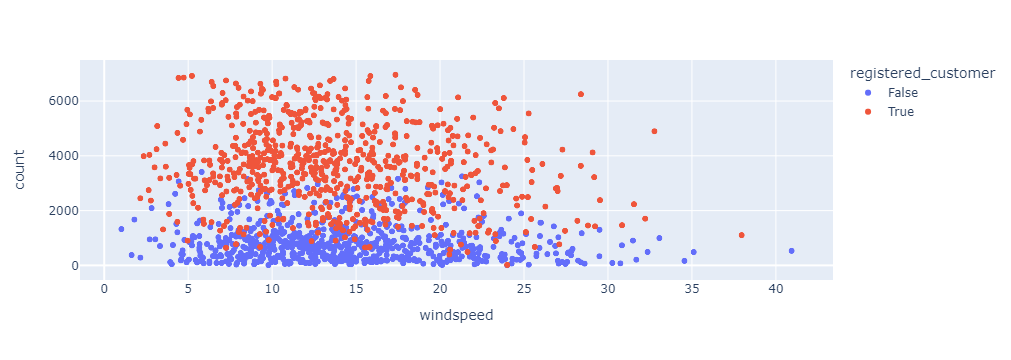

In [15]:
fig = px.scatter(df_by_day, x="windspeed", y="count", color="registered_customer")
fig.show()

In [16]:
df_by_day[df_by_day.datetime.isin(["2020-10-28", "2020-10-29", "2020-10-30", "2020-10-31"])]

,datetime,registered_customer,count,holiday,workingday,temp,atemp,humidity,windspeed
1332,2020-10-28,False,1301,0.0,0.0,19.951653,23.734554,60.874712,29.496459
1333,2020-10-28,True,3220,0.0,0.0,19.732460,23.532003,64.385714,29.180541
1334,2020-10-29,False,5,0.0,1.0,18.040000,21.970000,88.000000,23.999400
1335,2020-10-29,True,17,0.0,1.0,18.040000,21.970000,88.000000,23.999400
1336,2020-10-30,False,99,0.0,1.0,15.116162,17.920707,78.292929,13.796518
1337,2020-10-30,True,1646,0.0,1.0,14.442163,17.219207,80.221142,13.021287
1338,2020-10-31,False,419,0.0,1.0,15.947924,19.605859,59.057279,12.558710
1339,2020-10-31,True,5551,0.0,1.0,15.373486,18.996870,63.028283,11.613522


In [17]:
df_by_day.describe()

,count,holiday,workingday,temp,atemp,humidity,windspeed
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2254.460328,0.028728,0.683995,21.501690,24.980055,56.999506,14.035697
std,1825.807442,0.167098,0.465074,7.731829,8.392916,15.628639,5.907217
min,5.000000,0.000000,0.000000,3.169438,5.574141,0.000000,1.023035
25%,690.250000,0.000000,0.000000,14.926311,18.298906,44.979105,9.701508
50%,1678.000000,0.000000,1.000000,21.870582,25.637586,55.846155,13.289939
75%,3632.750000,0.000000,1.000000,28.180760,31.770591,67.595349,17.523949
max,6959.000000,1.000000,1.000000,37.749448,43.880231,97.900000,40.935791


In [18]:
df[df.datetime.dt.date.apply(str) == "2020-10-29"]

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered_customer
2981821,2020-10-29 00:01:59,False,True,light snow or rain or thunderstorm,18.04,21.97,88,23.9994,False
2981822,2020-10-29 00:04:39,False,True,light snow or rain or thunderstorm,18.04,21.97,88,23.9994,True
2981823,2020-10-29 00:07:12,False,True,light snow or rain or thunderstorm,18.04,21.97,88,23.9994,False
2981824,2020-10-29 00:07:57,False,True,light snow or rain or thunderstorm,18.04,21.97,88,23.9994,True
2981825,2020-10-29 00:13:37,False,True,light snow or rain or thunderstorm,18.04,21.97,88,23.9994,True
2981826,2020-10-29 00:13:47,False,True,light snow or rain or thunderstorm,18.04,21.97,88,23.9994,True
2981827,2020-10-29 00:15:51,False,True,light snow or rain or thunderstorm,18.04,21.97,88,23.9994,True
2981828,2020-10-29 00:20:54,False,True,light snow or rain or thunderstorm,18.04,21.97,88,23.9994,True
2981829,2020-10-29 00:22:29,False,True,light snow or rain or thunderstorm,18.04,21.97,88,23.9994,True
2981830,2020-10-29 00:23:59,False,True,light snow or rain or thunderstorm,18.04,21.97,88,23.9994,True


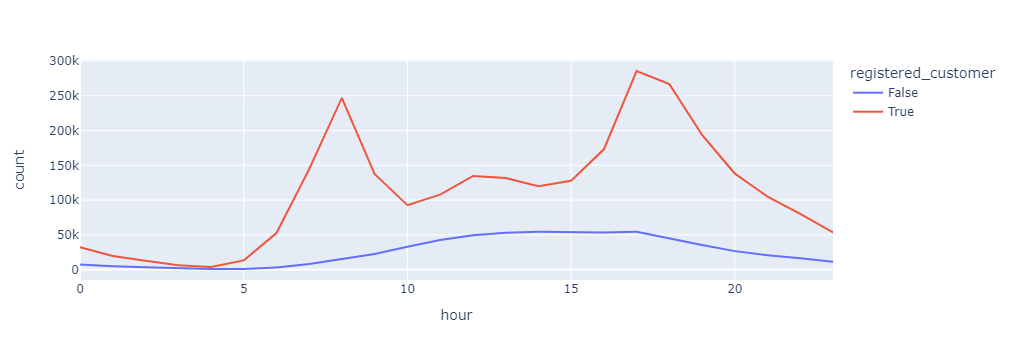

In [19]:
fig = px.line(df_by_hour, x="hour", y="count", color="registered_customer")
fig.show()

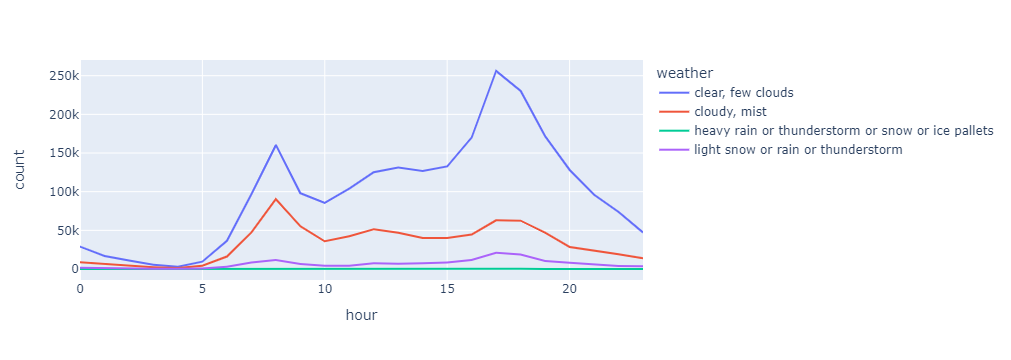

In [20]:
fig = px.line(df_by_weather, x="hour", y="count", color="weather")
fig.show()

In [21]:
df_by_hour

,hour,registered_customer,count,holiday,workingday,temp,atemp,humidity,windspeed
0,0,False,7412,0.044927,0.47531,22.847820,26.517522,69.557744,10.108258
1,0,True,32029,0.031222,0.453964,20.935487,24.459698,68.577539,10.306241
2,1,False,4648,0.042599,0.361231,21.958993,25.517612,71.004733,9.618428
3,1,True,19508,0.03332,0.316434,20.240902,23.665396,70.219295,10.057094
4,2,False,3307,0.052011,0.289084,21.248092,24.786451,71.652253,9.767869
5,2,True,12722,0.031363,0.249096,19.996604,23.450803,71.342320,9.867901
6,3,False,1783,0.03309,0.22995,20.789736,24.440098,73.179473,9.037909
7,3,True,6249,0.025124,0.321331,19.657036,23.126814,72.872460,9.593566
8,4,False,866,0.047344,0.398383,20.336189,23.866443,75.401848,10.078974
9,4,True,3743,0.029923,0.615816,19.655025,23.095254,74.586962,9.707933
